# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn import tree, preprocessing

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [4]:
#Import ords_prods_merged_analysis_cat pkl file
df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

In [5]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday


In [6]:
#If-statement with the loc() function to derive Fire_Size_Desc column
df.loc[df['FIRE_SIZE_CLASS'] == 'A', 'Fire_Size_Desc'] = '0.0 - 0.25 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'B', 'Fire_Size_Desc'] = '0.26 - 9.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'C', 'Fire_Size_Desc'] = '10.0 - 99.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'D', 'Fire_Size_Desc'] = '100 - 299 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'E', 'Fire_Size_Desc'] = '300 - 999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'F', 'Fire_Size_Desc'] = '1000 - 4999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'G', 'Fire_Size_Desc'] = '5000+ Acres'

• What are the main causes of wildfires? NWGC_GENERAL_CAUSE

• What percentage of wildfires are caused by humans? NWGC_GENERAL_CAUSE / Fire_Size_Desc

• When do wildfires happen? i.e., in which month and day of the week DISCOVERY_DOY / DISC_MONTH / DISC_DOW

• Have incidents been increasing or decreasing over time? FIRE_YEAR

• Where do fires occur? i.e., in which states and counties? COUNTY / FIPS_NAME / LATITUDE / LONGITUDE

• On which type of land do wildfires occur e.g., government owned etc. OWNER_DESCR / NWGC_GENERAL_CAUSE / Fire_Size_Desc

In [7]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW,Fire_Size_Desc
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday,0.0 - 0.25 Acres
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday,0.0 - 0.25 Acres
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday,0.0 - 0.25 Acres
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday,0.0 - 0.25 Acres
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday,0.0 - 0.25 Acres


In [8]:
df['OWNER_DESCR'].value_counts(dropna=False)

MISSING/NOT SPECIFIED    1011331
PRIVATE                   555554
USFS                      204082
BIA                       117326
STATE OR PRIVATE           71576
BLM                        69807
STATE                      52306
NPS                        19064
OTHER FEDERAL              15082
FWS                        13207
TRIBAL                     10878
MUNICIPAL/LOCAL            10852
UNDEFINED FEDERAL           9872
COUNTY                      5392
BOR                          409
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

### 3. Exploring Relationships

### Correlations:

In [8]:
# Create a correlation matrix using pandas

df.corr()

,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,DISC_MONTH
FOD_ID,1.000000,0.779479,-0.006549,0.002738,-0.018689,-0.084173,-0.006751
FIRE_YEAR,0.779479,1.000000,-0.007585,0.006641,0.028794,-0.016630,-0.007299
DISCOVERY_DOY,-0.006549,-0.007585,1.000000,0.005614,0.137472,-0.235148,0.995179
FIRE_SIZE,0.002738,0.006641,0.005614,1.000000,0.036459,-0.037659,0.005554
LATITUDE,-0.018689,0.028794,0.137472,0.036459,1.000000,-0.335333,0.138576
LONGITUDE,-0.084173,-0.016630,-0.235148,-0.037659,-0.335333,1.000000,-0.235882
DISC_MONTH,-0.006751,-0.007299,0.995179,0.005554,0.138576,-0.235882,1.000000


#### Create a correlation heatmap using seaborn:

In [9]:
df.columns

Index(['FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_NAME',
       'DISC_MONTH', 'DISC_DOW', 'Fire_Size_Desc'],
      dtype='object')

In [10]:
# Create a subset excluding the "FOD_ID", "DISCOVERY_DATE", 'FIRE_SIZE_CLASS',
#'COUNTY', 'FIPS_NAME' columns

sub = df[['FIRE_YEAR', 'DISCOVERY_DOY','NWCG_GENERAL_CAUSE', 'LATITUDE','LONGITUDE', 'OWNER_DESCR', 'STATE',
       'DISC_MONTH', 'DISC_DOW','FIRE_SIZE', 'Fire_Size_Desc']]

In [11]:
sub

,FIRE_YEAR,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc
0,2005,33,Power generation/transmission/distribution,40.036944,-121.005833,USFS,CA,2,Wednesday,0.10,0.0 - 0.25 Acres
1,2004,133,Natural,38.933056,-120.404444,USFS,CA,5,Wednesday,0.25,0.0 - 0.25 Acres
2,2004,152,Debris and open burning,38.984167,-120.735556,STATE OR PRIVATE,CA,5,Monday,0.10,0.0 - 0.25 Acres
3,2004,180,Natural,38.559167,-119.913333,USFS,CA,6,Monday,0.10,0.0 - 0.25 Acres
4,2004,180,Natural,38.559167,-119.933056,USFS,CA,6,Monday,0.10,0.0 - 0.25 Acres
...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,292,Missing data/not specified/undetermined,36.431667,-84.421667,PRIVATE,TN,10,Tuesday,125.00,100 - 299 Acres
2166749,2016,296,Missing data/not specified/undetermined,31.143611,-88.111944,PRIVATE,AL,10,Saturday,120.00,100 - 299 Acres
2166750,2017,92,Missing data/not specified/undetermined,33.920000,-85.310000,PRIVATE,AL,4,Sunday,120.00,100 - 299 Acres
2166751,2017,334,Missing data/not specified/undetermined,34.640000,-93.400000,USFS,AR,11,Thursday,110.00,100 - 299 Acres


In [12]:
#Convert quantitative variables to numerical values
le = preprocessing.LabelEncoder()
sub['NWCG_GENERAL_CAUSE'] = le.fit_transform(df['NWCG_GENERAL_CAUSE'])
sub['STATE'] = le.fit_transform(df['STATE'])
sub['DISC_DOW'] = le.fit_transform(df['DISC_DOW'])
sub['Fire_Size_Desc'] = le.fit_transform(df['Fire_Size_Desc'])
sub['OWNER_DESCR'] = le.fit_transform(df['OWNER_DESCR'])
print(sub.head())

/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_734/4234641372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['NWCG_GENERAL_CAUSE'] = le.fit_transform(df['NWCG_GENERAL_CAUSE'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_734/4234641372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['STATE'] = le.fit_transform(df['STATE'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_734/4234641372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

   FIRE_YEAR  DISCOVERY_DOY  NWCG_GENERAL_CAUSE   LATITUDE   LONGITUDE  \
0       2005             33                   9  40.036944 -121.005833   
1       2004            133                   7  38.933056 -120.404444   
2       2004            152                   1  38.984167 -120.735556   
3       2004            180                   7  38.559167 -119.913333   
4       2004            180                   7  38.559167 -119.933056   

   OWNER_DESCR  STATE  DISC_MONTH  DISC_DOW  FIRE_SIZE  Fire_Size_Desc  
0           15      4           2         6       0.10               0  
1           15      4           5         6       0.25               0  
2           12      4           5         1       0.10               0  
3           15      4           6         1       0.10               0  
4           15      4           6         1       0.10               0  


/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_734/4234641372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['OWNER_DESCR'] = le.fit_transform(df['OWNER_DESCR'])


In [13]:
sub

,FIRE_YEAR,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc
0,2005,33,9,40.036944,-121.005833,15,4,2,6,0.10,0
1,2004,133,7,38.933056,-120.404444,15,4,5,6,0.25,0
2,2004,152,1,38.984167,-120.735556,12,4,5,1,0.10,0
3,2004,180,7,38.559167,-119.913333,15,4,6,1,0.10,0
4,2004,180,7,38.559167,-119.933056,15,4,6,1,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...
2166748,2016,292,5,36.431667,-84.421667,10,43,10,5,125.00,3
2166749,2016,296,5,31.143611,-88.111944,10,1,10,2,120.00,3
2166750,2017,92,5,33.920000,-85.310000,10,1,4,3,120.00,3
2166751,2017,334,5,34.640000,-93.400000,15,2,11,4,110.00,3


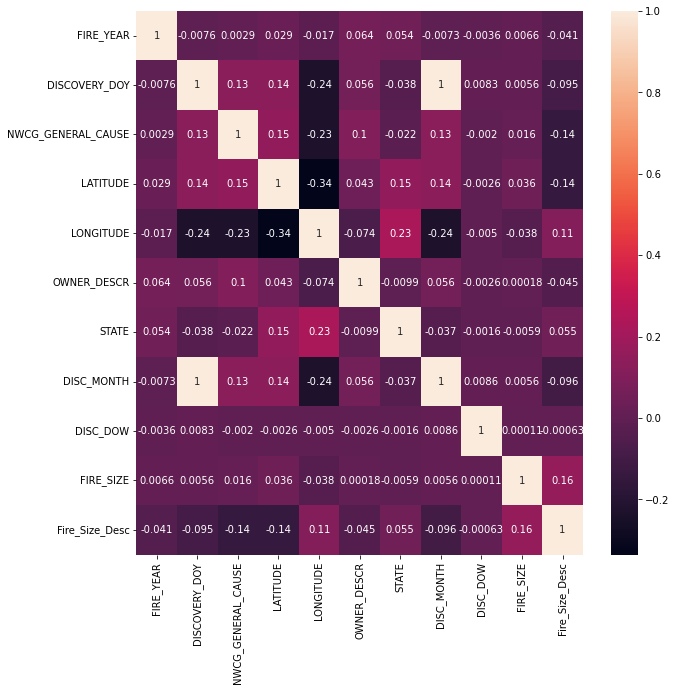

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Correlation Observations:

   - There are no clear strong correlations between variables
   - As expected, there is a correlation between State and Longitude and Latitude albeit slightly weaker
   - There could be a link between latitude and month, possible linked to season and weather

### Scatterplots:

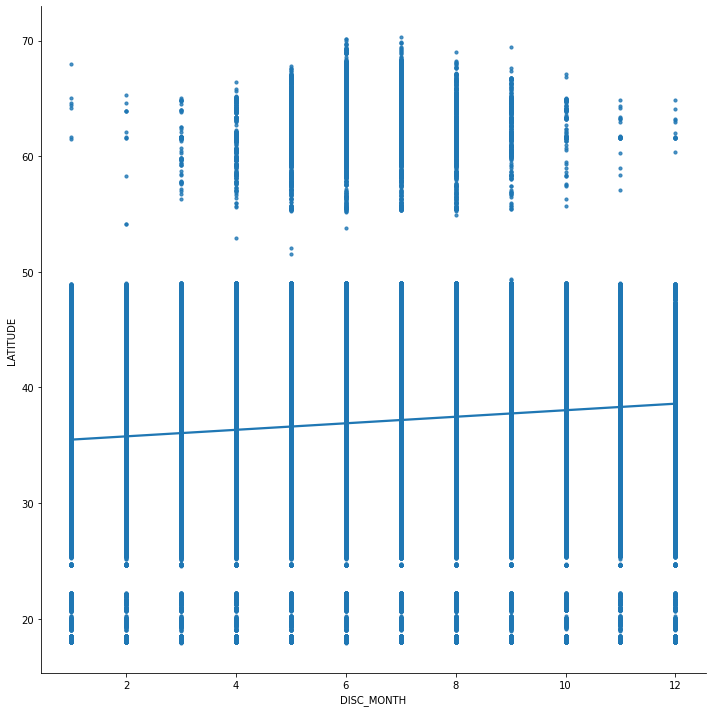

In [24]:
# Create a scatterplot for the "DISC_MONTH" and "LATITUDE" columns in seaborn

sns.lmplot(x = 'DISC_MONTH', y = 'LATITUDE', data = sub, height = 10, aspect = 1, scatter_kws={"s": 10})

The scatter plot shows a weak correlation between "DISC_MONTH" and "LATITUDE".
It would be intersting to see the scatter plot with a smaller sample of the data.

### Pair Plots:

In [64]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['DISCOVERY_DOY','NWCG_GENERAL_CAUSE', 'STATE',
       'DISC_MONTH', 'DISC_DOW', 'Fire_Size_Desc']]

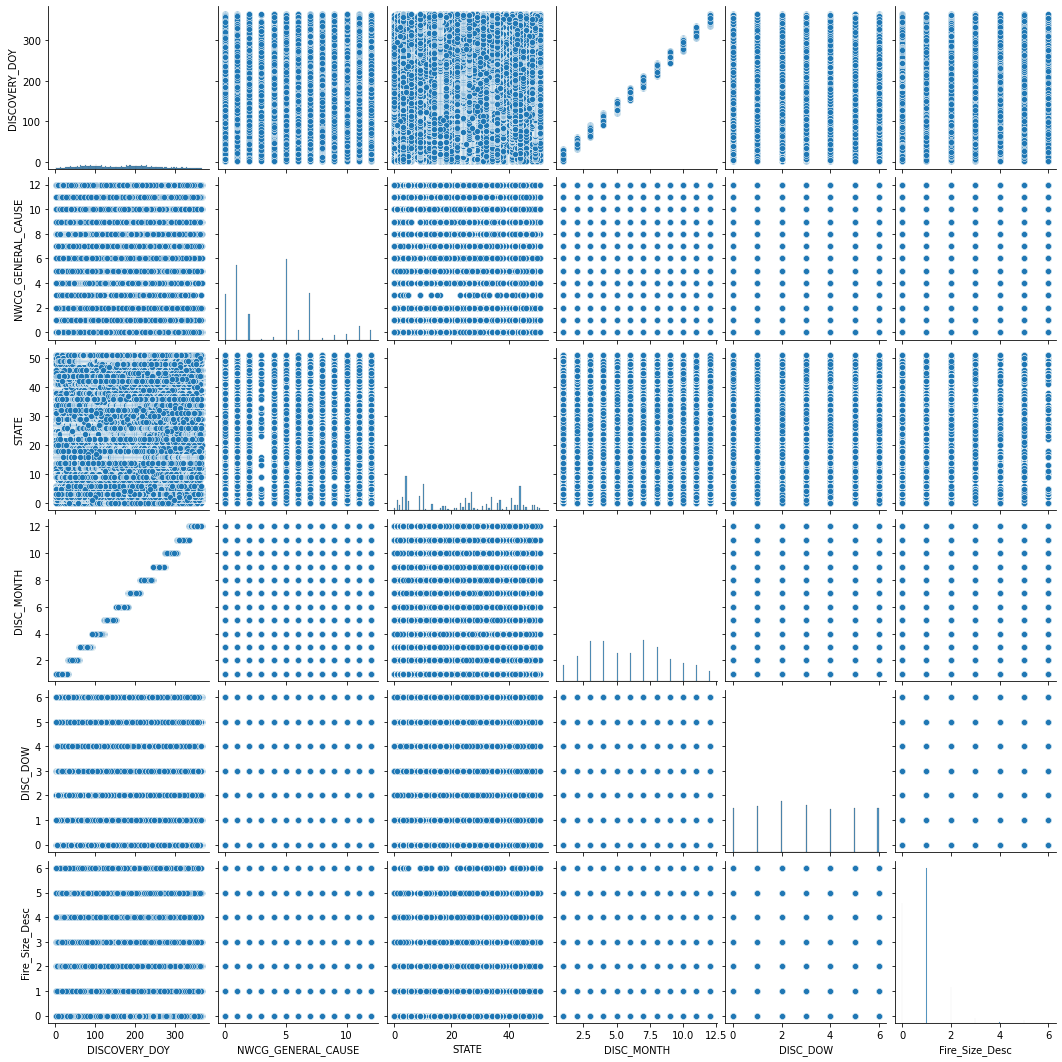

In [65]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.rcParams['figure.figsize']=(10,10)

Not much to comment on, perhaps with a smaller subset of data some correlations will become more visible

Will run the above graphs on a smaller sample of the data based on larger wildfires